
### 한국에서 코로나 바이러스에 감염된 사람들 데이터셋 처리
### 비교적 최신 데이터

csv 파일 형식

column 항목

* id: 확진자 id
* global_num: n번째 확진자
* sex: 성별
* birth_year: 출생 연도
* age: 나이
* country: 국적
* province: 방문지
* city: 발생 도시
* disease: 기저 질환
* infection_case: 감염 종류
* infection_order: 감염 차수 (n차 감염)
* infected_by: 해당 확진자의 감염원 id
* contact_number: 접촉자 수
* symptom_onset_date: 증상 발현일
* confirmed_date: 확진 일자
* released_date: 퇴원 일자 (격리 해제 일자)
* deceased_date: 사망 일자
* state: 상태

In [59]:
import csv
import pprint

#%matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np

#file path
data_covid19 ="COVID19 data/PatientInfo.csv"

with open(data_covid19) as file:
    reader = csv.reader(file)  # CSV 파일을 읽어들이는 읽기 객체
    raw = list(reader)      #  CSV 파일 내용을 리스트로 읽어들인다

pprint.pprint(raw[:3])  # 읽어들인 내용을 화면에 출력

[['patient_id',
  'sex',
  'age',
  'country',
  'province',
  'city',
  'infection_case',
  'infected_by',
  'contact_number',
  'symptom_onset_date',
  'confirmed_date',
  'released_date',
  'deceased_date',
  'state'],
 ['1000000001',
  'male',
  '50s',
  'Korea',
  'Seoul',
  'Gangseo-gu',
  'overseas inflow',
  '',
  '75',
  '2020-01-22',
  '2020-01-23',
  '2020-02-05',
  '',
  'released'],
 ['1000000002',
  'male',
  '30s',
  'Korea',
  'Seoul',
  'Jungnang-gu',
  'overseas inflow',
  '',
  '31',
  '',
  '2020-01-30',
  '2020-03-02',
  '',
  'released']]


In [60]:
raw_=raw[1:]

In [61]:
len(raw_)

5165

In [62]:
# 사망자와 완치자의 수
deceased = 0
released = 0
infected = 0

for i in range(len(raw_)):
    # status: 17
    state_of_patient = raw_[i][13]
    
    if(state_of_patient == 'deceased'):
        deceased = deceased + 1
    elif(state_of_patient == 'released'):
        released = released + 1
    else:
        infected = infected + 1
        
print("사망자 : " + str(deceased))
print("완치자 : " + str(released))
print("감염자 : " + str(infected))

사망자 : 78
완치자 : 2929
감염자 : 2158


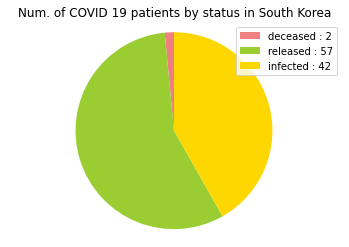

In [63]:
# The slices will be ordered and plotted counter-clockwise.
type_of_patient_status = ['deceased', 'released', 'infected']

num_of_patient_status = [deceased, released, infected]
sum_of_patient = deceased + released + infected
ratio_of_patient_status = []

for i in range(len(num_of_patient_status)):
    ratio_of_patient_status.append(num_of_patient_status[i] / sum_of_patient)

for i in range(len(ratio_of_patient_status)):
    type_of_patient_status[i] = type_of_patient_status[i] + " : {0:0.0f}".format(ratio_of_patient_status[i]*100)

colors = ['lightcoral', 'yellowgreen', 'gold']

patches, texts = plt.pie(ratio_of_patient_status, colors=colors, startangle=90)

plt.legend(patches, type_of_patient_status, loc="best")
plt.axis('equal')
plt.title("Num. of COVID 19 patients by status in South Korea")
# plt.show()

plt.savefig("img/01_num_of_patients.png")

In [64]:

# 나이대별 확진자의 수
age000 = 0
age010 = 0
age020 = 0
age030 = 0
age040 = 0
age050 = 0
age060 = 0
age070 = 0
age080 = 0
age090 = 0
age100 = 0
unknown_age = 0

for i in range(len(raw_)):
    
    # age: 2
    age_data = raw_[i][2]
    if(age_data == '' or age_data == ' '):
        unknown_age = unknown_age + 1
    else:
        if('0s'== age_data):
            age000 = age000 + 1
        elif('10s' == age_data):
            age010 = age010 + 1
        elif('20s' == age_data):
            age020 = age020 + 1
        elif('30s' == age_data):
            age030 = age030 + 1
        elif('40s' == age_data):
            age040 = age040 + 1
        elif('50s' == age_data):
            age050 = age050 + 1
        elif('60s' == age_data):
            age060 = age060 + 1
        elif('70s' == age_data):
            age070 = age070 + 1
        elif('80s' == age_data):
            age080 = age080 + 1
        elif('90s' == age_data):
            age090 = age100 + 1
        else:
            age100 = age100 + 1
            
print("어린이 확진자 : " + str(age000))
print("10대 확진자 : " + str(age010))
print("20대 확진자 : " + str(age020))
print("30대 확진자 : " + str(age030))
print("40대 확진자 : " + str(age040))
print("50대 확진자 : " + str(age050))
print("60대 확진자 : " + str(age060))
print("70대 확진자 : " + str(age070))
print("80대 확진자 : " + str(age080))
print("90대 확진자 : " + str(age090))
print("100세 이상 확진자 : " + str(age100))
print("나이 미상 확진자 : " + str(unknown_age))



어린이 확진자 : 66
10대 확진자 : 178
20대 확진자 : 899
30대 확진자 : 523
40대 확진자 : 518
50대 확진자 : 667
60대 확진자 : 482
70대 확진자 : 232
80대 확진자 : 170
90대 확진자 : 2
100세 이상 확진자 : 1
나이 미상 확진자 : 1380


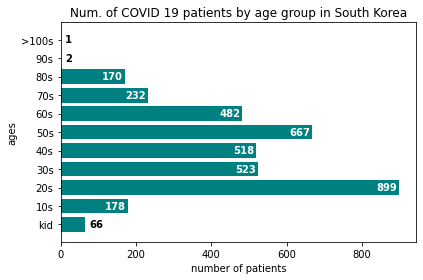

In [65]:

# draw bar chart
type_of_age = ['kid', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '>100s']
patient_age = [age000, age010, age020, age030, age040, age050, age060, age070, age080, age090, age100]

y_pos = [i for i, _ in enumerate(type_of_age)]

plt.barh(y_pos, patient_age, color='teal')
plt.ylabel("ages")
plt.xlabel("number of patients")
plt.title("Num. of COVID 19 patients by age group in South Korea")

plt.yticks(y_pos, type_of_age)

plt.tight_layout()

for i, v in enumerate(patient_age):
    x_axis_txt_mover = 60
    y_axis_txt_mover = .15
    txt_color = 'white'
    
    if(v < 100):
        x_axis_txt_mover = -10
        txt_color = 'black'
    
    plt.text(v - x_axis_txt_mover, i - y_axis_txt_mover, str(v), color=txt_color, fontweight='bold')

#plt.show()
plt.savefig("img/02_age_group")

In [33]:

ratio_of_20s = age010 / (sum(patient_age)-unknown_age)
print("전체 확진자 중 10대의 비율 : " + str(ratio_of_20s * 100) + "%")


전체 확진자 중 10대의 비율 : 7.548770144189991%


In [34]:

# 감염 날짜에 따른 10대 확진자 확인
bss_10s_date = []
ass_10s_date = []
ass_ex10s_num = 0
bss_ex10s_num = 0

starting_school_date = "2020-05-20"

for i in range(len(raw_)):
    
    trg_data = raw_[i]
    # confirm_date: 10
    date = trg_data[10] 
    # age: 2
    age_data = trg_data[2]
    
    if age_data == '' or age_data == ' ':
        pass
    else:
        if(age_data == '10s'):
            if(date >= starting_school_date):
                ass_10s_date.append(trg_data)
            elif(date < starting_school_date):
                bss_10s_date.append(trg_data)
        else:
            if(date >= starting_school_date):
                ass_ex10s_num += 1
            elif(date < starting_school_date):
                bss_ex10s_num += 1
                
ass_10s_num = len(ass_10s_date)
bss_10s_num = len(bss_10s_date)

print("개학 이후 10대 확진자 수 : " + str(ass_10s_num))
print("개학 이전 10대 확진자 수 : " + str(bss_10s_num))
print("개학 이후 10대 제외 확진자 수 : " + str(ass_ex10s_num))
print("개학 이전 10대 제외 확진자 수 : " + str(bss_ex10s_num))


sum_ass = ass_10s_num + ass_ex10s_num
sum_bss = bss_10s_num + bss_ex10s_num

ass_10_p_p = round(((ass_10s_num / sum_ass) * 100),1)

bss_10_p_p = round(((bss_10s_num / sum_bss) * 100),1)

print(ass_10_p_p)
print(bss_10_p_p)

개학 이후 10대 확진자 수 : 20
개학 이전 10대 확진자 수 : 158
개학 이후 10대 제외 확진자 수 : 318
개학 이전 10대 제외 확진자 수 : 3289
5.9
4.6


In [35]:
bss_ex10s_num / sum_bss * 100

95.41630403249202

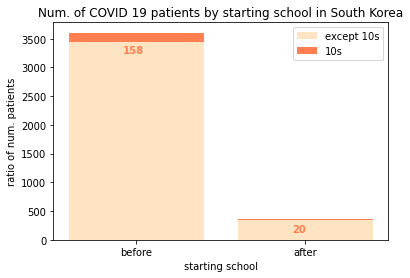

In [80]:
#노말리 제이션 적용 안한 그래프
x_axis_text = ['before', 'after']

ex10s_patient_list = [bss_10s_num + bss_ex10s_num,ass_10s_num + ass_ex10s_num]

patient_10s_list = [bss_10s_num, 
                    ass_10s_num]

plt.xticks([0, 1], x_axis_text)

plt.bar(range(len(ex10s_patient_list)), ex10s_patient_list, color='bisque') 
plt.bar(range(len(patient_10s_list)), patient_10s_list, bottom=ex10s_patient_list, color='coral')

plt.title("Num. of COVID 19 patients by starting school in South Korea")
plt.ylabel("ratio of num. patients")
plt.xlabel("starting school")
plt.legend(['except 10s', '10s'])

#plt.ylim([0, 100])

for i, v in enumerate(ex10s_patient_list):
    x_axis_txt_mover = 0.08
    y_axis_txt_mover = 200
    plt.text(i - x_axis_txt_mover, v - y_axis_txt_mover, round(patient_10s_list[i],1), color='coral', fontweight='bold')
    

#plt.show()
plt.savefig("img/03_trash_starting_school_10s_ratio.png")

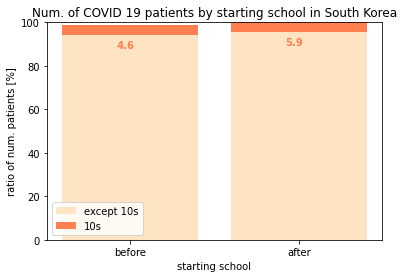

In [37]:
x_axis_text = ['before', 'after']

ex10s_patient_list = [100 - ass_10_p_p, 100 - bss_10_p_p]

patient_10s_list = [bss_10_p_p, 
                    ass_10_p_p]

plt.xticks([0, 1], x_axis_text)

plt.bar(range(len(ex10s_patient_list)), ex10s_patient_list, color='bisque') 
plt.bar(range(len(patient_10s_list)), patient_10s_list, bottom=ex10s_patient_list, color='coral')

plt.title("Num. of COVID 19 patients by starting school in South Korea")
plt.ylabel("ratio of num. patients [%]")
plt.xlabel("starting school")
plt.legend(['except 10s', '10s'])

plt.ylim([0, 100])

for i, v in enumerate(ex10s_patient_list):
    x_axis_txt_mover = 0.08
    y_axis_txt_mover = 6
    plt.text(i - x_axis_txt_mover, v - y_axis_txt_mover, round(patient_10s_list[i],1), color='coral', fontweight='bold')
    
#plt.show()

plt.savefig("img/03_starting_school_10s_ratio.png")

### 10대의 감염원인 찾기

* 개학전 10대 환자 리스트 : bss_10s_date
* 개학후 10대 환자 리스트 : ass_10s_date
* infection case : 6

In [38]:
ass_10s_date[0]

['1000000863',
 'male',
 '10s',
 'Korea',
 'Seoul',
 'Yangcheon-gu',
 'overseas inflow',
 '',
 '',
 '',
 '2020-06-01',
 '',
 '',
 'released']

In [39]:
#개학 전 10대 확진자의 감염 원인(한재이)
bss_10_case_list = []
bss_10_case_num_list =[]

for i in bss_10s_date:
    if i[6] in bss_10_case_list:
        pass
    else:
        bss_10_case_list.append(i[6])
        bss_10_case_num_list.append(0)
        
#개학 후 10대 확진자의 감염 원인
ass_10_case_list = []
ass_10_case_num_list =[]

for i in ass_10s_date:
    if i[6] in ass_10_case_list:
        pass
    else:
        ass_10_case_list.append(i[6])
        ass_10_case_num_list.append(0)
        

In [40]:
# 개학 전 10대 확진자의 감연 원인 수 확인 
for i in bss_10s_date:
    
    tmp_infection_case = i[6]
    
    for j in range(len(bss_10_case_list)):
        
        if tmp_infection_case == bss_10_case_list[j] and (tmp_infection_case == 'etc' or tmp_infection_case == ''):
            bss_10_case_num_list[2] += 1
        
        elif tmp_infection_case == bss_10_case_list[j]:
            bss_10_case_num_list[j] += 1
    

del bss_10_case_list[-3]
del bss_10_case_num_list[-3]

In [41]:
# 개학 후 10대 
for i in ass_10s_date:
    tmp_infection_case = i[6]
    for j in range(len(ass_10_case_list)):
        if tmp_infection_case == ass_10_case_list[j] and (tmp_infection_case == 'etc' or tmp_infection_case == ''):
            ass_10_case_num_list[1] += 1
        
        elif tmp_infection_case == ass_10_case_list[j]:
            ass_10_case_num_list[j] += 1
del ass_10_case_list[2]
del ass_10_case_num_list[2]

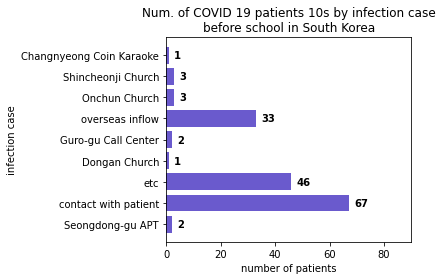

In [42]:
#개학 전 10대 확진자의 감염 원인 수 확인 그래프
# draw bar chart
infection_case = bss_10_case_list
num_of_case = bss_10_case_num_list

y_pos = [i for i, _ in enumerate(infection_case)]

plt.barh(y_pos, num_of_case, color='slateblue')
plt.ylabel("infection case")
plt.xlabel("number of patients")
plt.title("Num. of COVID 19 patients 10s by infection case" + "\n" + "before school in South Korea")

plt.yticks(y_pos, infection_case)
plt.xlim([0, 90])

plt.tight_layout()

for i, v in enumerate(num_of_case):
    x_axis_txt_mover = 60
    y_axis_txt_mover = .15
    txt_color = 'white'
    
    if(v < 100):
        x_axis_txt_mover = -2
        txt_color = 'black'
    
    plt.text(v - x_axis_txt_mover, i - y_axis_txt_mover, str(v), color=txt_color, fontweight='bold')



plt.savefig("img/04_10s_case_BSS.png")

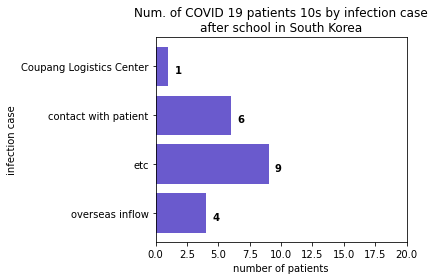

In [43]:

# 개학 후 10대 확진자의 감염 원인 수 확인 그래프
# draw bar chart
infection_case = ass_10_case_list
num_of_case = ass_10_case_num_list

y_pos = [i for i, _ in enumerate(infection_case)]

plt.barh(y_pos, num_of_case, color='slateblue')
plt.ylabel("infection case")
plt.xlabel("number of patients")
plt.title("Num. of COVID 19 patients 10s by infection case" + "\n" + "after school in South Korea")

plt.yticks(y_pos, infection_case)
plt.xlim([0, 20])

plt.tight_layout()

for i, v in enumerate(num_of_case):
    x_axis_txt_mover = 60
    y_axis_txt_mover = .15
    txt_color = 'white'
    
    if(v < 100):
        x_axis_txt_mover = -0.5
        txt_color = 'black'
    
    plt.text(v - x_axis_txt_mover, i - y_axis_txt_mover, str(v), color=txt_color, fontweight='bold')



plt.savefig("img/05_10s_case_ASS.png")

# 확진자 지도에 표기하기

csv 파일 형식
column 항목

* 환자 id
* global num.
* 날짜
* 도 이름
* 도시 이름
* 감염 장소
* 위도
* 경도


In [67]:
# define file path
file_path_for_pos = 'COVID19 data/PatientRoute.csv'

# open patient.csv data
with open(file_path_for_pos) as file:
    reader = csv.reader(file)         # read CSV file
    raw_pos = list(reader)            # CSV file convert to list type

pprint.pprint(raw_pos[:3])            # print somw column in CSV

raw_pos_ = raw_pos[1:]

[['patient_id', 'date', 'province', 'city', 'type', 'latitude', 'longitude'],
 ['1000000001',
  '2020-01-22',
  'Gyeonggi-do',
  'Gimpo-si',
  'airport',
  '37.61525',
  '126.7156'],
 ['1000000001',
  '2020-01-24',
  'Seoul',
  'Jung-gu',
  'hospital',
  '37.56724',
  '127.0057']]


In [68]:
pos_10s_patient_BSS = {'id'        : [],
                       'province'  : [],
                       'city'      : [],
                       'type'     : [],
                       'latitude'  : [],
                       'longitude' : []}

for i in range(len(raw_pos_)):
    
    tmp_pos_data = raw_pos_[i]
    
    for j in bss_10s_date:
        
        if(tmp_pos_data[0] == j[0]):
            pos_10s_patient_BSS['id'].append(tmp_pos_data[0])
            pos_10s_patient_BSS['province'].append(tmp_pos_data[2])
            pos_10s_patient_BSS['city'].append(tmp_pos_data[3])
            pos_10s_patient_BSS['type'].append(tmp_pos_data[4])
            pos_10s_patient_BSS['latitude'].append(tmp_pos_data[5])
            pos_10s_patient_BSS['longitude'].append(tmp_pos_data[6])

In [69]:
# after starting school
pos_10s_patient_ASS = {'id'        : [],
                       'province'  : [],
                       'city'      : [],
                       'type'     : [],
                       'latitude'  : [],
                       'longitude' : []}

for i in range(len(raw_pos_)):
    tmp_pos_data = raw_pos_[i]
    for j in ass_10s_date:
        if(tmp_pos_data[0] == j[0]):
            pos_10s_patient_ASS['id'].append(tmp_pos_data[0])
            pos_10s_patient_ASS['province'].append(tmp_pos_data[2])
            pos_10s_patient_ASS['city'].append(tmp_pos_data[3])
            pos_10s_patient_ASS['type'].append(tmp_pos_data[4])
            pos_10s_patient_ASS['latitude'].append(tmp_pos_data[5])
            pos_10s_patient_ASS['longitude'].append(tmp_pos_data[6])

In [70]:
import folium

In [71]:
southkorea_map = folium.Map(location=[36.55,126.983333], zoom_start=7,
                            titles='loation of 10s patient in South Korea before starting school')

In [72]:
zip_tmp_data = zip(pos_10s_patient_BSS['latitude'], 
                   pos_10s_patient_BSS['longitude'], 
                   pos_10s_patient_BSS['province'], 
                   pos_10s_patient_BSS['city'], 
                   pos_10s_patient_BSS['type'])

for lat, lon, province, city, visit in zip_tmp_data:
    popup_data = folium.map.Popup(html = ('<b>' + 'Province: ' + '</b>' + str(province) + '<br>' + 
                                          '<b>' + 'City: ' + '</b>' + str(city) + '<br>' + 
                                          '<b>' + 'type: ' + '</b>' + str(visit) + '<br>'),
                                  max_width = 250)
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                        popup =popup_data,
                        fill_color='red',
                        fill_opacity=0.5 ).add_to(southkorea_map)

In [73]:
southkorea_map.save('COVID_19_10s_patient_BSS_in_South_Korea.html')

In [74]:

southkorea_map = folium.Map(location=[36.55,126.983333], zoom_start=7,
                            titles='loation of 10s patient in South Korea after starting school')

In [75]:
zip_tmp_data = zip(pos_10s_patient_ASS['latitude'], 
                   pos_10s_patient_ASS['longitude'], 
                   pos_10s_patient_ASS['province'], 
                   pos_10s_patient_ASS['city'], 
                   pos_10s_patient_ASS['type'])

for lat, lon, province, city, visit in zip_tmp_data:
    popup_data = folium.map.Popup(html = ('<b>' + 'Province: ' + '</b>' + str(province) + '<br>' + 
                                          '<b>' + 'City: ' + '</b>' + str(city) + '<br>' + 
                                          '<b>' + 'type: ' + '</b>' + str(visit) + '<br>'),
                                  max_width = 250)
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                        popup =popup_data,
                        fill_color='red',
                        fill_opacity=0.5 ).add_to(southkorea_map)

In [76]:
southkorea_map.save('COVID_19_10s_patient_ASS_in_South_Korea.html')

In [77]:
southkorea_map = folium.Map(location=[36.55,126.983333], zoom_start=7,
                            titles='loation of 10s patient in South Korea')


In [78]:
zip_tmp_data = zip((pos_10s_patient_BSS['latitude']  + pos_10s_patient_ASS['latitude']), 
                   (pos_10s_patient_BSS['longitude'] + pos_10s_patient_ASS['longitude']), 
                   (pos_10s_patient_BSS['province']  + pos_10s_patient_ASS['province']), 
                   (pos_10s_patient_BSS['city']      + pos_10s_patient_ASS['city']), 
                   (pos_10s_patient_BSS['type']     + pos_10s_patient_ASS['type']))

for lat, lon, province, city, visit in zip_tmp_data:
    popup_data = folium.map.Popup(html = ('<b>' + 'Province: ' + '</b>' + str(province) + '<br>' + 
                                          '<b>' + 'City: ' + '</b>' + str(city) + '<br>' + 
                                          '<b>' + 'type: ' + '</b>' + str(visit) + '<br>'),
                                  max_width = 250)
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                        popup =popup_data,
                        fill_color='red',
                        fill_opacity=0.5 ).add_to(southkorea_map)

In [79]:
southkorea_map.save('COVID_19_10s_patient_in_South_Korea.html')
